In [720]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [721]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from collections import Counter 
from sklearn.model_selection import KFold

In [722]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [723]:
### import the dataset
data = pd.read_excel ('hmeq.xlsx')
print (data.shape)
print (data.columns.values)

(5960, 14)
['CustomerID' 'BAD' 'LOAN' 'MORTDUE' 'VALUE' 'REASON' 'JOB' 'YOJ' 'DEROG'
 'DELINQ' 'CLAGE' 'NINQ' 'CLNO' 'DEBTINC']


In [724]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  5960 non-null   int64  
 1   BAD         5960 non-null   int64  
 2   LOAN        5960 non-null   int64  
 3   MORTDUE     5442 non-null   float64
 4   VALUE       5848 non-null   float64
 5   REASON      5708 non-null   object 
 6   JOB         5681 non-null   object 
 7   YOJ         5445 non-null   float64
 8   DEROG       5252 non-null   float64
 9   DELINQ      5380 non-null   float64
 10  CLAGE       5652 non-null   float64
 11  NINQ        5450 non-null   float64
 12  CLNO        5738 non-null   float64
 13  DEBTINC     4693 non-null   float64
dtypes: float64(9), int64(3), object(2)
memory usage: 652.0+ KB


In [725]:
# Find out the sum of null value in each column 
print(data.isnull().sum())

CustomerID       0
BAD              0
LOAN             0
MORTDUE        518
VALUE          112
REASON         252
JOB            279
YOJ            515
DEROG          708
DELINQ         580
CLAGE          308
NINQ           510
CLNO           222
DEBTINC       1267
dtype: int64


In [726]:
# Summary of Missing data percentage 
percent_of_missing_value = data.isnull().sum()/len(data)
percent_of_missing_value

CustomerID    0.000000
BAD           0.000000
LOAN          0.000000
MORTDUE       0.086913
VALUE         0.018792
REASON        0.042282
JOB           0.046812
YOJ           0.086409
DEROG         0.118792
DELINQ        0.097315
CLAGE         0.051678
NINQ          0.085570
CLNO          0.037248
DEBTINC       0.212584
dtype: float64

## Description of each column 
Loan: Amount of the loan request 

MORTDUE: Amount due on existing mortgage 

VALUE: Value of current property

REASON: DebtCon = debt consolidation; HomeImp = home improvement

JOB: Occupational categories (job categories)

YOJ: Years at present job

DEROG: Number of major derogatory reports

DELINQ: Number of delinquent credit lines 

CLAGE: Age of oldest credit line in months 

NINQ: Number of recent credit inquiries

CLNO: Number of credit lines

DEBTINC: Debt-to-income ratio 

In [727]:
data.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,5960.0,NaN,NaN,NaN,2980.5,1720.648134,1.0,1490.75,2980.5,4470.25,5960.0
BAD,5960.0,NaN,NaN,NaN,0.199497,0.399656,0.0,0.0,0.0,0.0,1.0
LOAN,5960.0,NaN,NaN,NaN,18607.969799,11207.480417,1100.0,11100.0,16300.0,23300.0,89900.0
MORTDUE,5442.0,NaN,NaN,NaN,73760.8172,44457.609458,2063.0,46276.0,65019.0,91488.0,399550.0
VALUE,5848.0,NaN,NaN,NaN,101776.048741,57385.775334,8000.0,66075.5,89235.5,119824.25,855909.0
REASON,5708,2,DebtCon,3928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JOB,5681,6,Other,2388,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YOJ,5445.0,NaN,NaN,NaN,8.922268,7.573982,0.0,3.0,7.0,13.0,41.0
DEROG,5252.0,NaN,NaN,NaN,0.25457,0.846047,0.0,0.0,0.0,0.0,10.0
DELINQ,5380.0,NaN,NaN,NaN,0.449442,1.127266,0.0,0.0,0.0,0.0,15.0


## Data Cleaning 

In [728]:
# drop N/A in Debt to income variable 
data1 = data.drop(data[data.DEBTINC.isna()].index)
data1.shape

(4693, 14)

In [729]:
# Impute 0 to N/A to the variables "NINQ" and "DEROG"

data1[['NINQ','DEROG','VALUE','MORTDUE','YOJ']] = data1[['NINQ','DEROG','VALUE','MORTDUE','YOJ']].fillna(0)


In [730]:
# Impute mean value to the variables: CLNO, DELINQ, CLAGE
data1[['DELINQ','CLNO','CLAGE']]= data1[['DELINQ','CLNO','CLAGE']].fillna(data1[['DELINQ','CLNO','CLAGE']].mean())


In [731]:
categorical = [var for var in data1.columns if data1[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 2 categorical variables

The categorical variables are :

 ['REASON', 'JOB']


In [732]:
data1[['REASON', 'JOB']] = data1[['REASON', 'JOB']].fillna('Other')

In [733]:
# Impute categorical variables with mode 
# data1['REASON'].fillna(data1['REASON'].mode()[0],inplace = True)

In [734]:
# Impute job with mode (Categorical variable) because the names of jobs did not be listed, so filling with 'other' is suitable. 
data1['JOB'].fillna(data1['JOB'].mode()[0],inplace = True)

In [735]:
data1['REASON'].value_counts()

REASON
DebtCon    3128
HomeImp    1369
Other       196
Name: count, dtype: int64

In [736]:
data1['JOB'].value_counts()

JOB
Other      2073
ProfExe    1024
Office      789
Mgr         586
Self        142
Sales        79
Name: count, dtype: int64

In [737]:
# Convert categorical variables into dummy variables 
data2 = pd.get_dummies(data1,columns=['REASON','JOB'],dtype= float)
data2.isna().sum()

CustomerID        0
BAD               0
LOAN              0
MORTDUE           0
VALUE             0
YOJ               0
DEROG             0
DELINQ            0
CLAGE             0
NINQ              0
CLNO              0
DEBTINC           0
REASON_DebtCon    0
REASON_HomeImp    0
REASON_Other      0
JOB_Mgr           0
JOB_Office        0
JOB_Other         0
JOB_ProfExe       0
JOB_Sales         0
JOB_Self          0
dtype: int64

## Create a new data set -- Correlation Matrix

<function matplotlib.pyplot.show(close=None, block=None)>

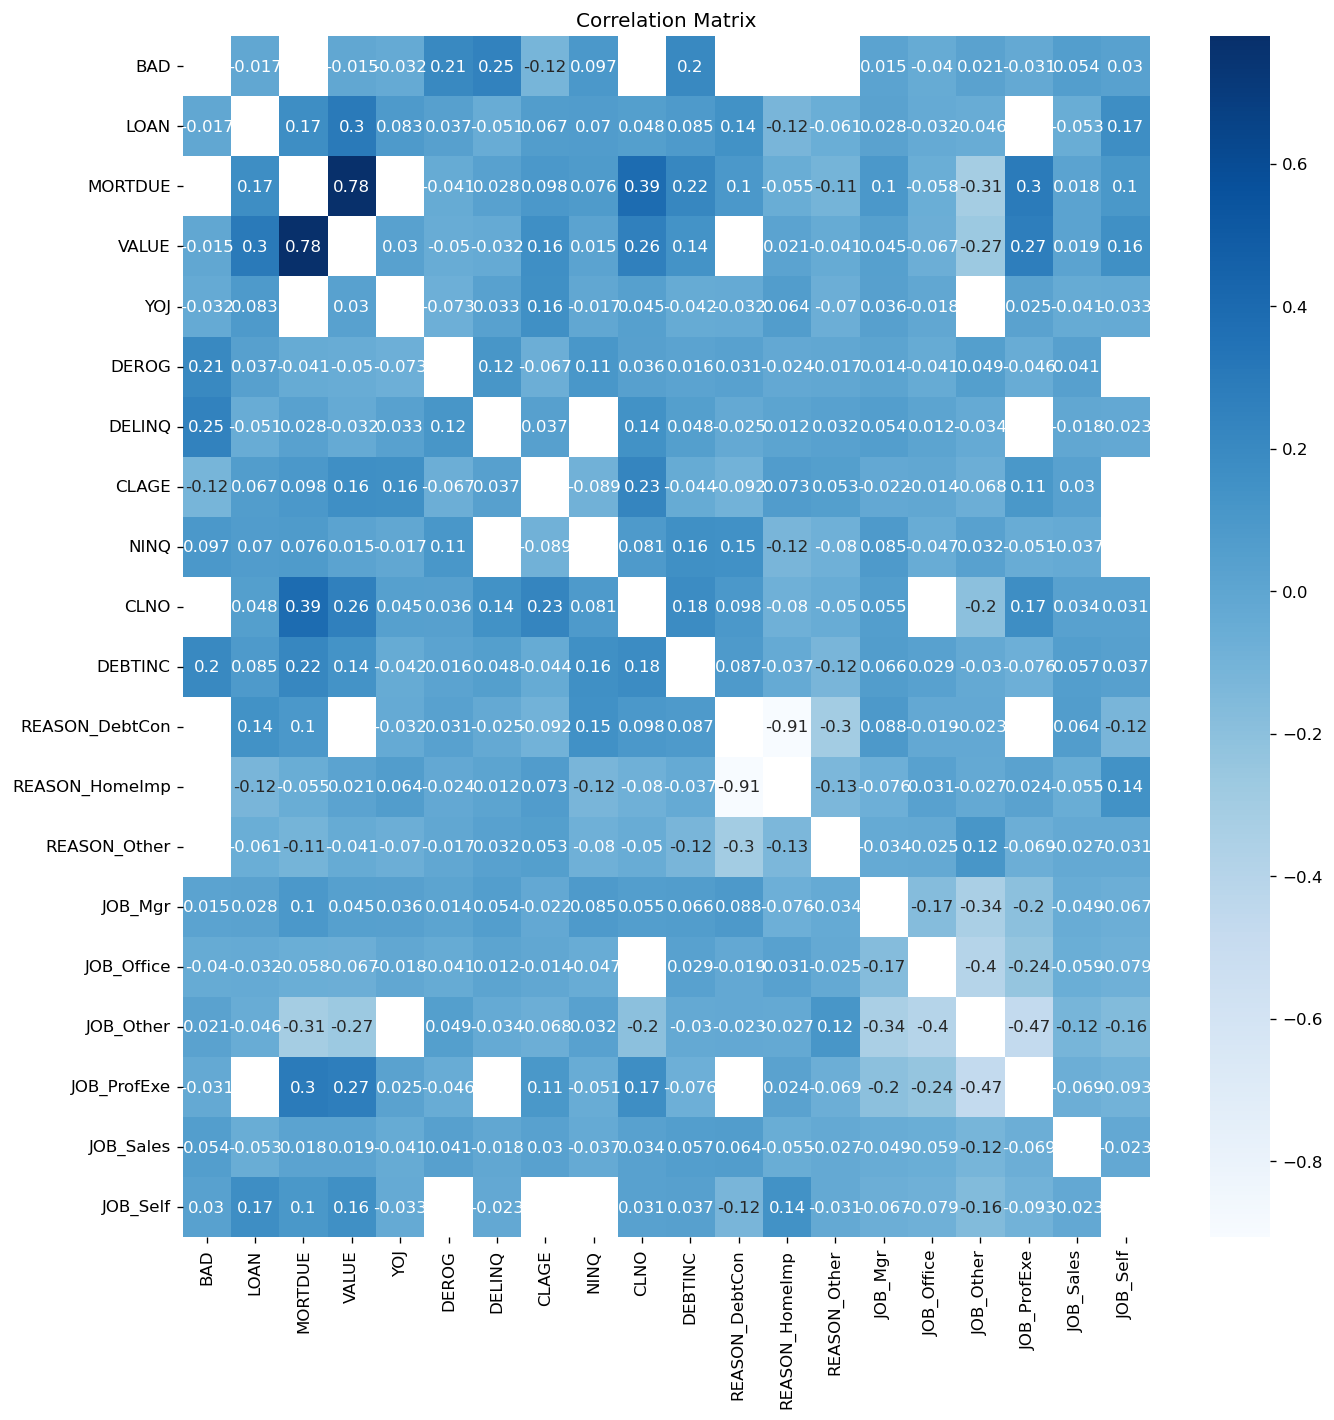

In [738]:
data3 = data2.loc[:, data2.columns != 'CustomerID']
dfCorr = pd.DataFrame(data3).corr() 
filteredDf = dfCorr[((dfCorr >= .01) | (dfCorr <= -.01)) & (dfCorr != 1.000)]
plt.figure(figsize= (13,13))
sns.heatmap(filteredDf, annot = True, cmap = 'Blues')
plt.title('Correlation Matrix')
plt.show

In [739]:
data4 = data1[['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ',
 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC' ]]

<function matplotlib.pyplot.show(close=None, block=None)>

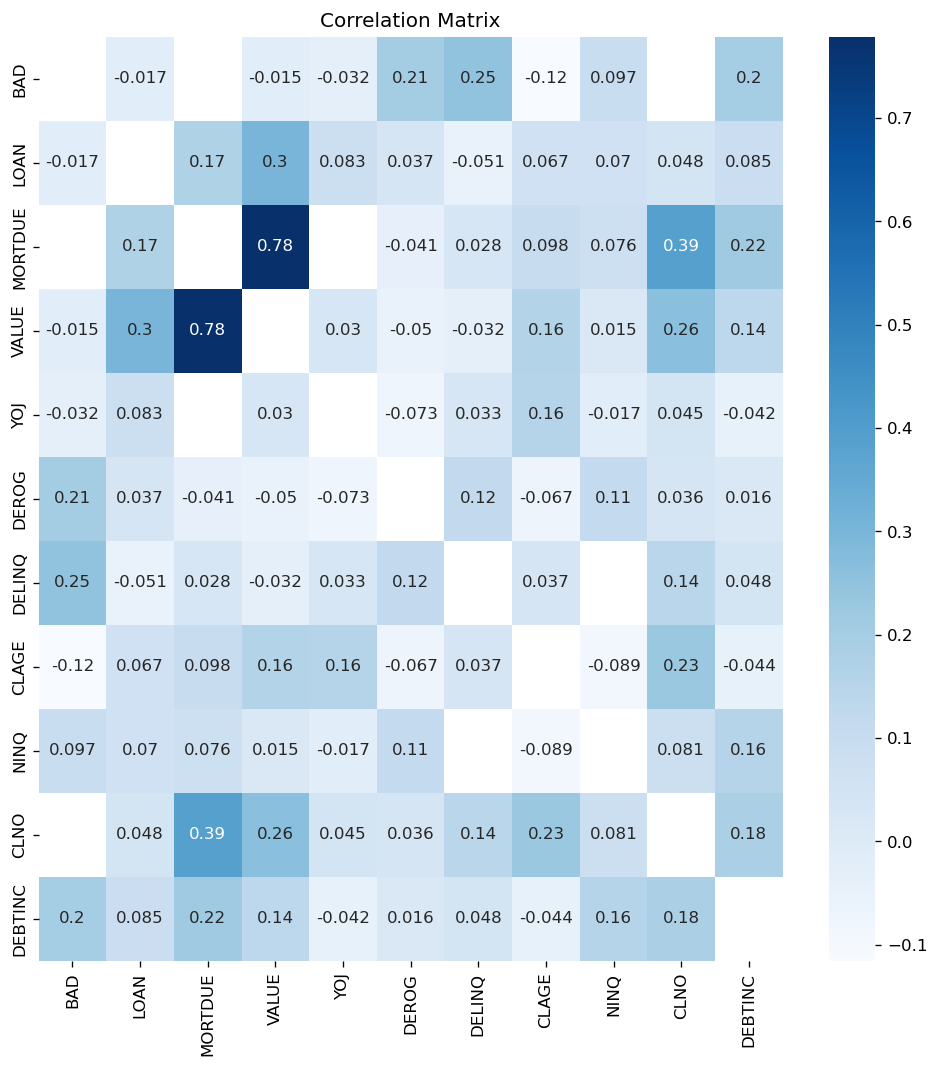

In [740]:
## heatmap of correlations - only show if greater than 1% (or threshold can be changed)
dfCorr = pd.DataFrame(data4).corr() 
filteredDf = dfCorr[((dfCorr >= .01) | (dfCorr <= -.01)) & (dfCorr != 1.000)]
plt.figure(figsize= (10,10))
sns.heatmap(filteredDf, annot = True, cmap = 'Blues')
plt.title('Correlation Matrix')
plt.show


## Descriptive stats and histograms for 5 variables 

In [741]:
print (data2['DEBTINC'].describe().round(decimals=2))

count    4693.00
mean       33.78
std         8.60
min         0.52
25%        29.14
50%        34.82
75%        39.00
max       203.31
Name: DEBTINC, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

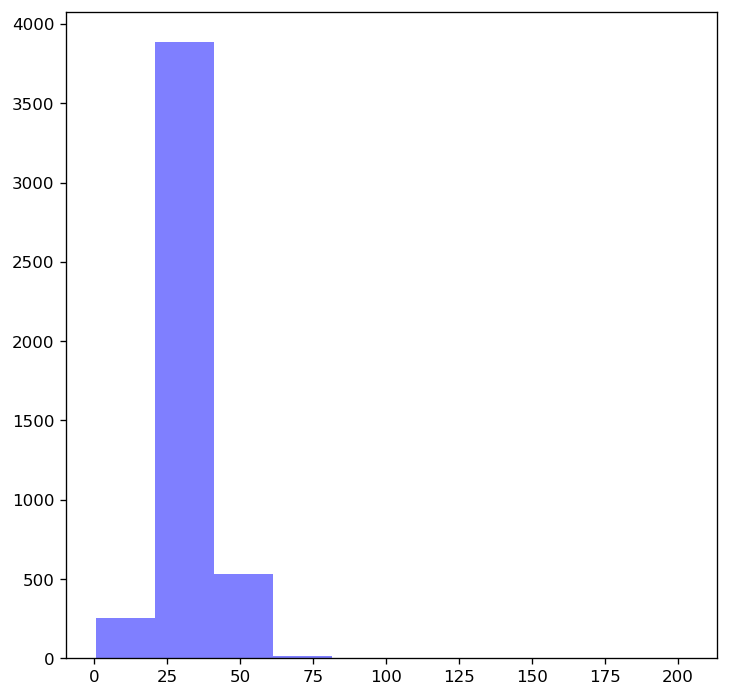

In [742]:
# Descriptive stats and histogram for Debt-to-income variable 
import matplotlib.mlab as mlab
x = data2['DEBTINC']
num_bins = 10
n,bins, patches = plt.hist(x, num_bins, facecolor = 'blue', alpha =0.5)
plt.show

<Axes: xlabel='CLAGE', ylabel='Count'>

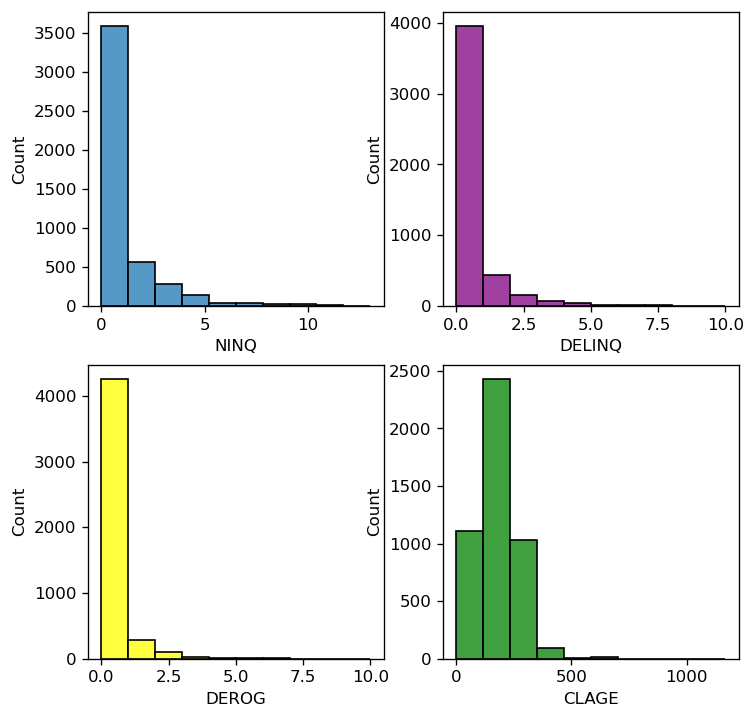

In [743]:
import seaborn as sns

plt.rcParams.update({'figure.figsize':(7,7), 'figure.dpi':120})

fig,ax = plt.subplots(2,2)
sns.histplot(data = data2['NINQ'], bins = 10,ax = ax[0,0])
sns.histplot(data = data2['DELINQ'], bins = 10,ax = ax[0,1],color= 'purple')
sns.histplot(data = data2['DEROG'], bins = 10,ax = ax[1,0],color='yellow')
sns.histplot(data = data2['CLAGE'], bins = 10,ax = ax[1,1],color= 'green')


(array([[   0.,    0.,    0., ...,    0.,    0.,    0.],
        [4290.,    0.,    0., ...,    0.,    0.,    0.],
        [   0.,    0.,    0., ...,    0.,    0.,    0.],
        ...,
        [3669.,    0.,    0., ...,    0.,    0.,    0.],
        [4614.,    0.,    0., ...,    0.,    0.,    0.],
        [4551.,    0.,    0., ...,    0.,    0.,    0.]]),
 array([ 0.        ,  0.13659921,  0.27319841,  0.40979762,  0.54639682,
         0.68299603,  0.81959523,  0.95619444,  1.09279364,  1.22939285,
         1.36599205,  1.50259126,  1.63919046,  1.77578967,  1.91238887,
         2.04898808,  2.18558728,  2.32218649,  2.45878569,  2.5953849 ,
         2.7319841 ,  2.86858331,  3.00518251,  3.14178172,  3.27838092,
         3.41498013,  3.55157933,  3.68817854,  3.82477774,  3.96137695,
         4.09797615,  4.23457536,  4.37117456,  4.50777377,  4.64437297,
         4.78097218,  4.91757138,  5.05417059,  5.19076979,  5.327369  ,
         5.4639682 ,  5.60056741,  5.73716661,  5.87376582,

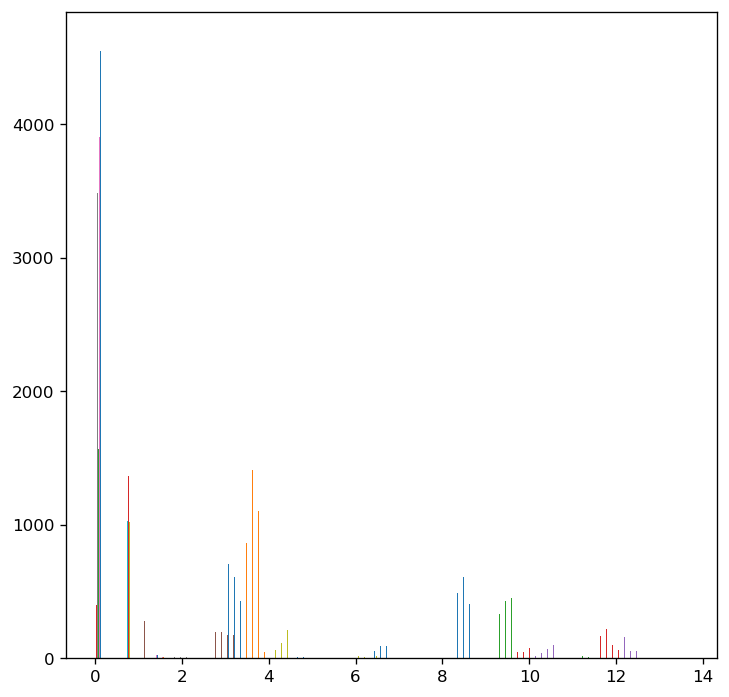

In [744]:
# Applying logarithmic scaling to reduce skewness in data distributions.
# Apply Log Transformation to the data
Log_data = np.log1p(data2)
plt.hist(Log_data,bins = 100, label = 'Log Transformation Data')

#### Linear Regression -> OLS -> LOGISTIC ###

In [745]:
data_ols = smf.ols(formula = 'BAD ~ DEBTINC + DEROG + DELINQ + NINQ + CLAGE' , data=data2).fit()
print(data_ols.summary()) 

                            OLS Regression Results                            
Dep. Variable:                    BAD   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     154.4
Date:                Fri, 12 Jan 2024   Prob (F-statistic):          3.26e-152
Time:                        15:40:51   Log-Likelihood:                -330.30
No. Observations:                4693   AIC:                             672.6
Df Residuals:                    4687   BIC:                             711.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0876      0.018     -4.898      0.0


## UniVARIATE LOGISTIC MODEL & OOS predictions
### out of sample testing and ROC curve

In [746]:
# Pursue intial analysis for gauging the strength and the direction of relationships between each predictor and outcome varible.
# Help in identifying which variables might be worth including in more complex models
x = pd.DataFrame(data1['CLAGE']).copy()
y = pd.DataFrame(data1['BAD']).copy()
print(y.value_counts())


BAD
0      4290
1       403
Name: count, dtype: int64


In [747]:
# Apply Oversampling to solve the problem of imbalance data 
ros = RandomOverSampler()
x_ros1, y_ros_1 = ros.fit_resample(x,y)


In [748]:
x_train,x_test,y_train,y_test = train_test_split(x_ros1,y_ros_1,test_size=0.3,random_state = 0)

In [749]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6006, 1)
(2574, 1)
(6006, 1)
(2574, 1)


In [750]:
x_train = x_train.values.reshape(-1,1)
y_train = y_train.values.reshape(-1)
x_test = x_test.values.reshape(-1,1)
y_test = y_test.values.reshape(-1)


In [751]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred  = lr.predict(x_test)

In [752]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[764 518]
 [497 795]]


In [753]:
logit_roc_auc = roc_auc_score(y_test, lr.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(x_test)[:,1])
plt.figure()

<Figure size 840x840 with 0 Axes>

<Figure size 840x840 with 0 Axes>

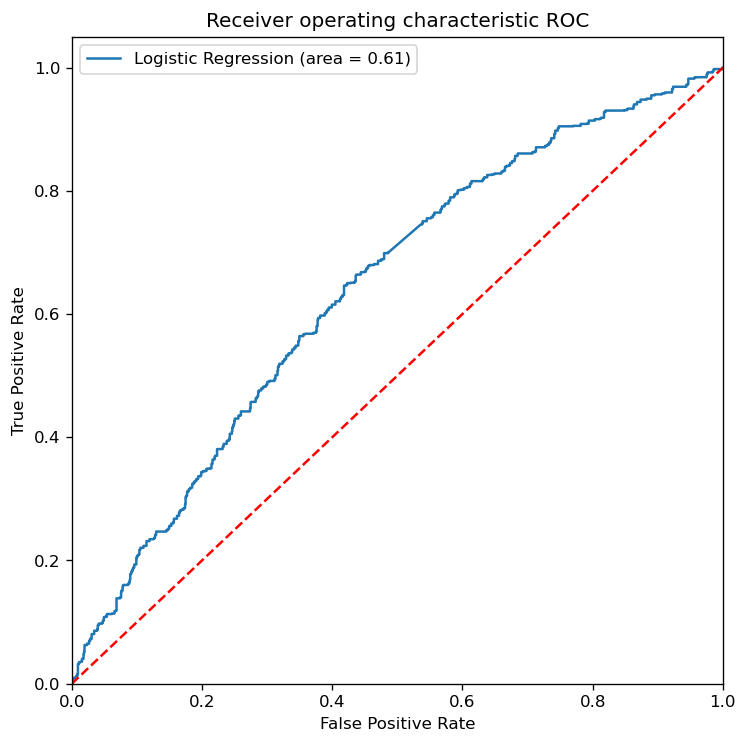

In [754]:
plt.plot(fpr, tpr, label = 'Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ROC')
plt.legend(loc="upper left")


## Logistic model with 5 variables

Before : Counter({0: 4290, 1: 403})
After : Counter({1: 4290, 0: 4290})


[[1011  271]
 [ 473  819]]


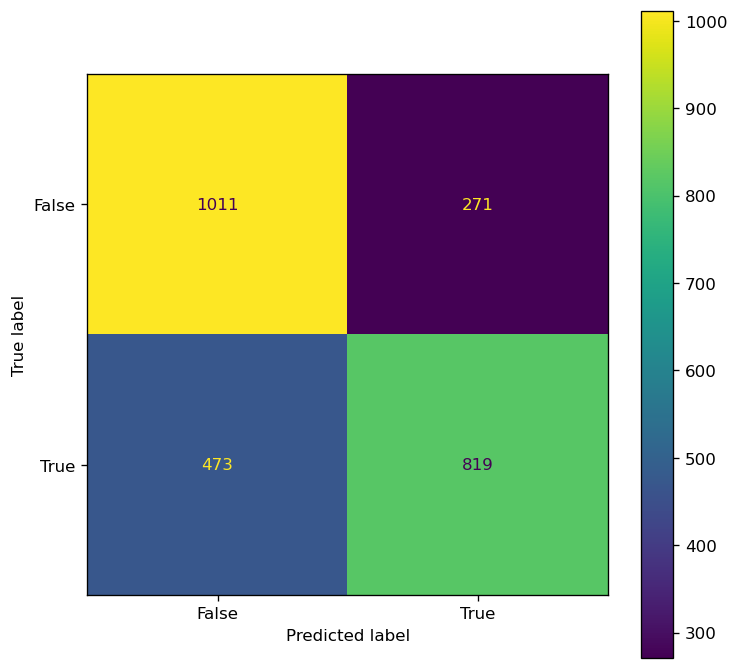

{'Accuracy': 0.710955710955711, 'Precision': 0.7513761467889908, 'Sensitivity_recall': 0.6339009287925697, 'Specificity': 0.7886115444617785, 'F1_score': 0.6876574307304786}
AUC for logitstic regression is: 78.36%


In [755]:
#define the predictor variables and the response variable
x = data1[['DEBTINC', 'DEROG', 'DELINQ','NINQ','CLAGE']].copy()
y = data1['BAD'].copy()

# Apply Oversampling to solve the problem of imbalance data 
counter = Counter(y)
ros = SMOTE(random_state = 42)
x,y = ros.fit_resample(x,y)
counter1 = Counter(y)

#Split the dataset into 70% training data and 30% test data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state= 0)
print('Before :',counter)
print('After :', counter1)


# Fit the model using the train data
log_regression = LogisticRegression()
log_regression.fit(x_train, y_train)

# Confusion matrix
y_pred = log_regression.predict(x_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False,True])
cm_display.plot()
plt.show()

# Model performances
Accuracy = metrics.accuracy_score(y_test,y_pred)
Precision = metrics.precision_score(y_test,y_pred)
Sensitivity_recall = metrics.recall_score(y_test,y_pred)
Specificity = metrics.recall_score(y_test,y_pred, pos_label=0)
F1_score = metrics.f1_score(y_test,y_pred)
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})

# define metrics
y_pred_proba = log_regression.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print(f'AUC for logitstic regression is: {auc*100:5.2f}%')

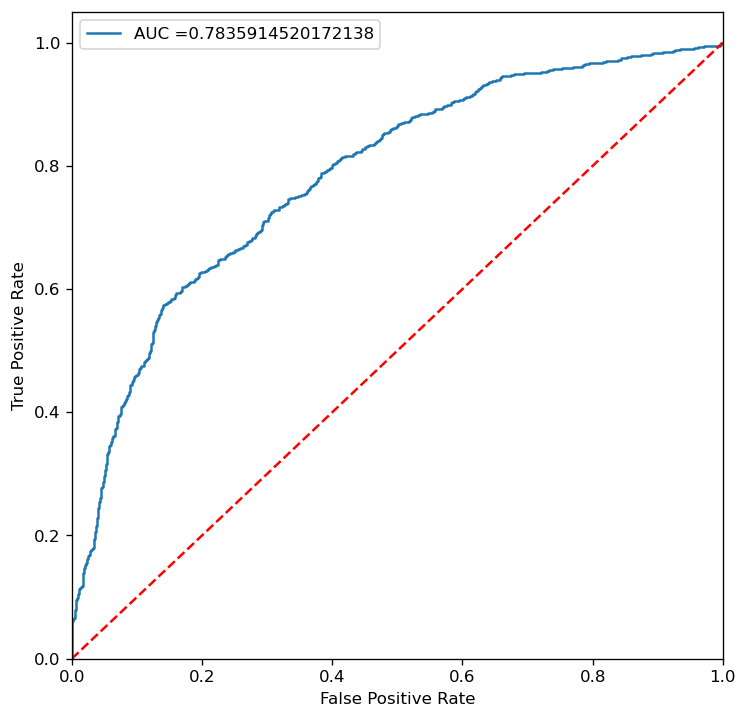

In [756]:
#create ROC curve
plt.plot(fpr,tpr, label = "AUC ="+ str(auc))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 2)

In [757]:
##MULTIVARIATE logit MODEL & predictions
model_lr2 = smf.glm('BAD ~ DEBTINC + DEROG + DELINQ + NINQ + CLNO', family = sm.families.Binomial(), data = data2).fit()
print(model_lr2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    BAD   No. Observations:                 4693
Model:                            GLM   Df Residuals:                     4687
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1144.2
Date:                Fri, 12 Jan 2024   Deviance:                       2288.5
Time:                        15:40:52   Pearson chi2:                 5.72e+03
No. Iterations:                     6   Pseudo R-squ. (CS):            0.09347
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5301      0.317    -17.450      0.0

In [758]:
PD_logit_model = pd.DataFrame(model_lr2.fittedvalues, columns = ['PD_logit_model'])
data5 = pd.concat([data2, PD_logit_model], axis = 1)
data5.head(10)
 

,CustomerID,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,...,REASON_DebtCon,REASON_HomeImp,REASON_Other,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self,PD_logit_model
5,6,1,1700,30548.0,40320.0,9.0,0.0,0.00000,101.466002,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.087940
7,8,1,1800,28502.0,43034.0,11.0,0.0,0.00000,88.766030,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.077752
17,18,1,2200,23030.0,0.0,19.0,0.0,0.30543,183.751040,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.003632
19,20,0,2300,102370.0,120953.0,2.0,0.0,0.00000,90.992533,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.043504
25,26,1,2400,34863.0,47471.0,12.0,0.0,0.00000,70.491080,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.068289
26,27,0,2400,98449.0,117195.0,4.0,0.0,0.00000,93.811775,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.036954
34,35,0,2900,103949.0,112505.0,1.0,0.0,0.00000,96.102330,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.038144
35,36,0,2900,104373.0,120702.0,2.0,0.0,0.00000,101.540298,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.037704
36,37,1,2900,7750.0,67996.0,16.0,3.0,0.00000,122.204663,2.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.361246
37,38,1,2900,61962.0,70915.0,2.0,0.0,0.00000,282.801659,3.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.133123


# Decision Tree Model

Optimal hyperparameter combination:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4}
Mean cross-validated AUC of the best_estimator:  0.95575830711121
{'Accuracy': 93.66744366744368, 'Precision': 95.03937007874016, 'Sensitivity_recall': 92.34889058913542, 'Specificity': 95.02762430939227, 'F1_score': 93.67481567714397}
AUC score in Decision Tree Model is : 0.9368825744926385


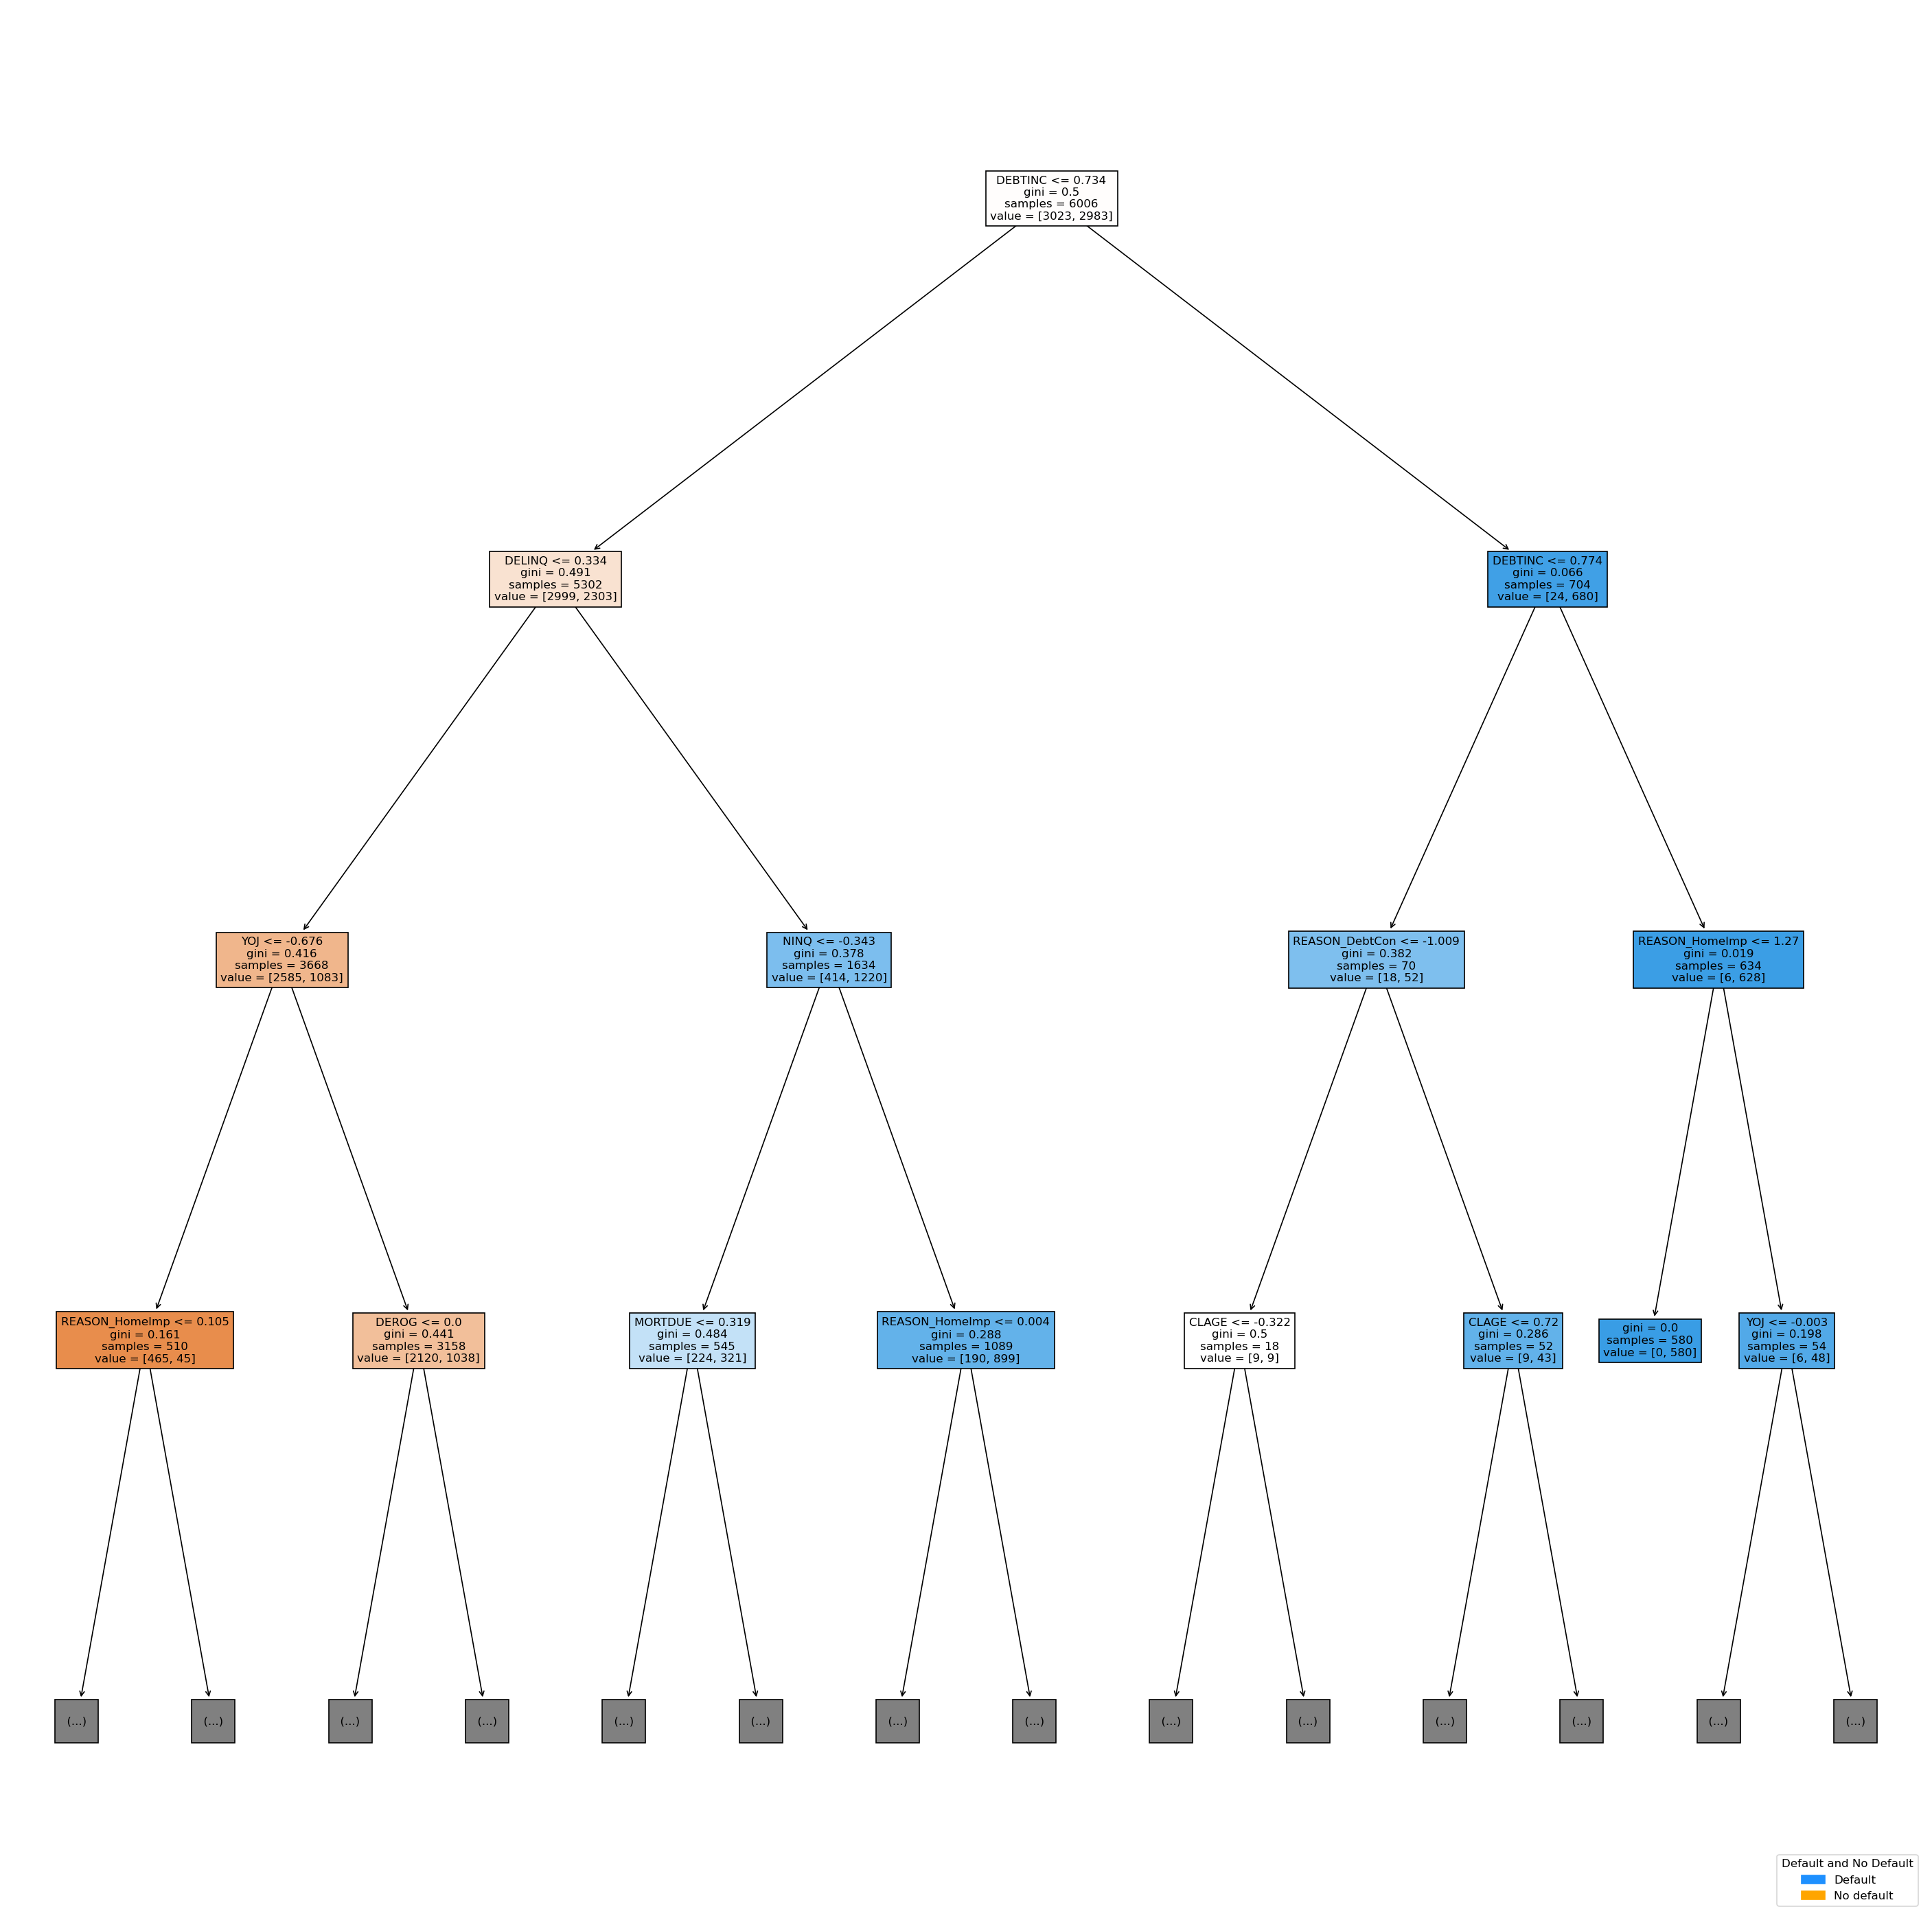

In [759]:
x = data3.drop('BAD',axis = 1).copy()
y = data3['BAD'].copy()

# Apply Oversampling to solve the problem of imbalance data 
counter = Counter(y)
ros = SMOTE(random_state = 42)
x,y = ros.fit_resample(x,y)
counter1 = Counter(y)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state= 42)

# Feature scaling
cols = x_train.columns 

# Transform data to decrease the impact from outliers by suing the median and interquartile range for scaling
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Promote hyperparameter tuning to find the optimal parameters for the model
dt = DecisionTreeClassifier(
                           random_state=42)
hyperparameter_space = {'max_depth':[None,3,4,5,6,7,8,9], 
                        'min_samples_leaf':[1,2,3,4,5,6],
                        'max_features':['sqrt','log2']}

gs = GridSearchCV(dt, param_grid=hyperparameter_space , 
                  scoring="roc_auc",
                  n_jobs=2, cv=5, return_train_score=True)

gs.fit(x_train, y_train)
print("Optimal hyperparameter combination: ", gs.best_params_)
print("Mean cross-validated AUC of the best_estimator: ",
       gs.best_score_)

best_gs = gs.best_estimator_
# y_pred_proba_tree = best_gs.predict_proba(x_test)[:,1]
# fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba_tree)
# auc = metrics.roc_auc_score(y_test, y_pred_proba_tree)
# print('AUC score in Decision Tree Model is :',auc)

# Calculate the confusion matrix
test_prediction = best_gs.predict(x_test)
metrics.confusion_matrix(y_test,test_prediction,labels = [0,1])

# Measure the model performances
Accuracy_of_tree = accuracy_score(y_test,test_prediction)*100
Precision = metrics.precision_score(y_test,test_prediction)*100
Sensitivity_recall = metrics.recall_score(y_test,test_prediction)*100
Specificity = metrics.recall_score(y_test,test_prediction, pos_label=0)*100
F1_score = metrics.f1_score(y_test,test_prediction)*100
print({"Accuracy":Accuracy_of_tree,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})

#Calculate AUCROC
fpr, tpr, _ = metrics.roc_curve(y_test, test_prediction)
auc = metrics.roc_auc_score(y_test, test_prediction)
print('AUC score in Decision Tree Model is :',auc)

# Visualize the tree
feature_names=x.columns 
best_gs.feature_importances_
fig = plt.figure(figsize=(30, 30))
tree.plot_tree(best_gs,feature_names=feature_names, filled=True, fontsize=10, max_depth= 3)

# Example of adding a legend
class_names = ['Default', 'No default'] 
colors = ['dodgerblue', 'orange']  

# Create legend handles and labels
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
legend_labels = class_names

# Add legend to the figure
plt.legend(legend_handles, legend_labels, loc='lower right', title='Default and No Default')

plt.show()


# Random Forest Model

In [760]:
x = data3.drop('BAD',axis = 1).copy()
y = data3['BAD'].copy()

# Apply Oversampling to solve the problem of imbalance data 
counter = Counter(y)
ros = SMOTE(random_state = 42)
x,y = ros.fit_resample(x,y)
counter1 = Counter(y)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state= 42)

n_estimators = [int(x) for x in np.linspace(start = 1, stop = 100, num = 10)]
# Number of features to consider at every split
max_features = ['log2', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 10, num = 1)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 8, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4, 6,8]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

# Use the random grid to search for best hyperparameters to narrow down the range for each hyperparameter
# First create the base model to tune
rf = RandomForestClassifier(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1, error_score = 'raise')
# Fit the random search model
rf_random.fit(x_train, y_train)
# pred_rf= rf_random.predict(x_test)
rf_random.best_params_


{'n_estimators': [1, 12, 23, 34, 45, 56, 67, 78, 89, 100], 'max_features': ['log2', 'sqrt'], 'max_depth': [1], 'min_samples_split': [2, 5, 8, 10], 'min_samples_leaf': [2, 4, 6, 8], 'bootstrap': [True, False]}
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=12; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=12; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min

{'n_estimators': 78,
 'min_samples_split': 2,
 'min_samples_leaf': 6,
 'max_features': 'sqrt',
 'max_depth': 1,
 'bootstrap': True}

In [761]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [2, 4, 6],
    'max_features': [2, 3],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 4, 6],
    'n_estimators': [35, 45, 55, 67]
}
# Create a based model
rf = RandomForestClassifier(random_state = 42)
# Instantiate the grid search model
# Now that we know where to concentrate our search, we can explicitly specify every combination of settings to try
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 0)
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_

pred_rf= best_grid.predict(x_test)

from sklearn.metrics import classification_report
print("The accuracy of Random Forest model is:", accuracy_score(y_test, pred_rf))
print(classification_report(y_test,pred_rf, target_names= ['Non Default','Default'],digits= 5))
# y_pred_proba_rf = best_grid.predict_proba(x_test)[:,1]
# fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba_rf)
# auc = metrics.roc_auc_score(y_test, y_pred_proba_rf)

auc = metrics.roc_auc_score(y_test, pred_rf)
print('AUC score in Random Forest Model is :',auc)

{'bootstrap': False, 'max_depth': 6, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 45}
The accuracy of Random Forest model is: 0.9168609168609169
              precision    recall  f1-score   support

 Non Default    0.87367   0.97159   0.92003      1267
     Default    0.96910   0.86381   0.91343      1307

    accuracy                        0.91686      2574
   macro avg    0.92138   0.91770   0.91673      2574
weighted avg    0.92213   0.91686   0.91668      2574

AUC score in Random Forest Model is : 0.9176983385558547


In [762]:
# Use the random grid to search for best hyperparameters to narrow down the range for each hyperparameter
# First create the base model to tune
rf = RandomForestClassifier(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1, error_score = 'raise')
# Fit the random search model
rf_random.fit(x_train, y_train)
# pred_rf= rf_random.predict(x_test)
rf_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=12; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=12; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=12; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=6, min_samples_split=8, n_estimators=56; total time=   0.1s
[

{'n_estimators': 78,
 'min_samples_split': 2,
 'min_samples_leaf': 6,
 'max_features': 'sqrt',
 'max_depth': 1,
 'bootstrap': True}

In [763]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [2, 4, 6],
    'max_features': [2, 3],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 4, 6],
    'n_estimators': [35, 45, 55, 67]
}
# Instantiate the grid search model
# Now that we know where to concentrate our search, we can explicitly specify every combination of settings to try
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 0)
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_

{'bootstrap': False, 'max_depth': 6, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 45}


In [764]:
pred_rf1= best_grid.predict(x_test)

from sklearn.metrics import classification_report
print("The accuracy of Random Forest model is:", accuracy_score(y_test, pred_rf1))
print(classification_report(y_test,pred_rf, target_names= ['Non Default','Default'],digits= 5))
# y_pred_proba_rf = best_grid.predict_proba(x_test)[:,1]
# fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba_rf)
auc = metrics.roc_auc_score(y_test, pred_rf1)
print('AUC score in Random Forest Model is :',auc)

The accuracy of Random Forest model is: 0.9168609168609169
              precision    recall  f1-score   support

 Non Default    0.87367   0.97159   0.92003      1267
     Default    0.96910   0.86381   0.91343      1307

    accuracy                        0.91686      2574
   macro avg    0.92138   0.91770   0.91673      2574
weighted avg    0.92213   0.91686   0.91668      2574

AUC score in Random Forest Model is : 0.9176983385558547


# Important features with Random Forest Model 

In [765]:
rf_100 = RandomForestClassifier(n_estimators= 100, random_state= 42)
rf_100.fit(x_train, y_train)

feature_scores = pd.Series(rf_100.feature_importances_, index = x_train.columns).sort_values(ascending = True)
print(feature_scores)


JOB_Self          0.003774
REASON_Other      0.004138
JOB_Sales         0.007947
JOB_Mgr           0.023193
JOB_ProfExe       0.031562
JOB_Office        0.032689
REASON_HomeImp    0.034764
REASON_DebtCon    0.034793
LOAN              0.044444
CLNO              0.050142
MORTDUE           0.053698
JOB_Other         0.057701
YOJ               0.058781
CLAGE             0.067136
VALUE             0.069204
DEROG             0.075857
NINQ              0.077573
DEBTINC           0.121762
DELINQ            0.150843
dtype: float64


Text(0.5, 1.0, 'Feature Importances')

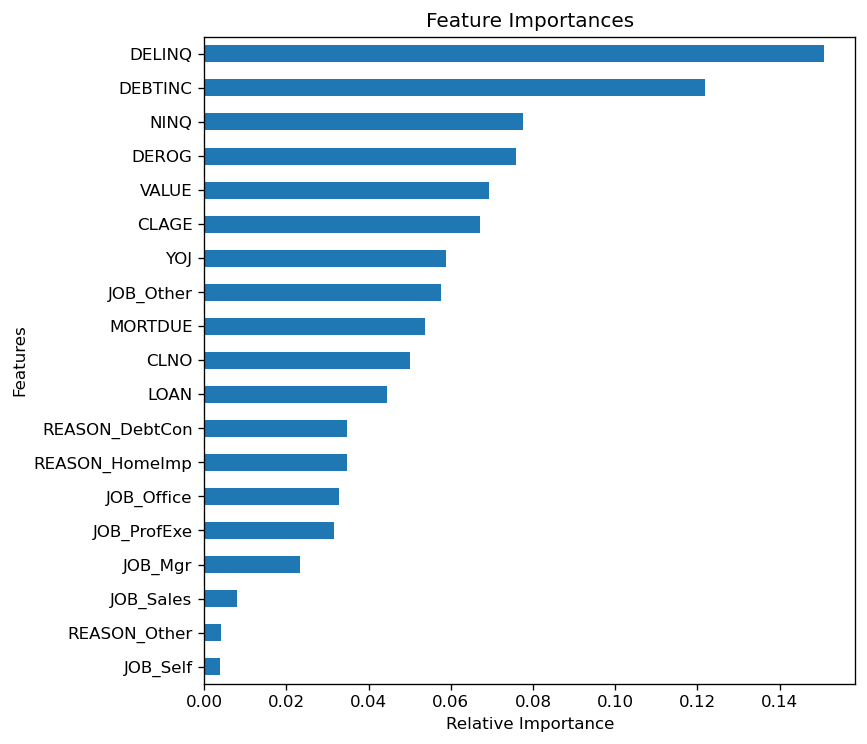

In [766]:
feature_scores.plot(kind = 'barh')
plt.ylabel('Features')
plt.xlabel('Relative Importance')
plt.title('Feature Importances')


When considering the factors contributing to the probability of default, DELINQ, DEBTINC, NINQ,  DEROG, and VALUE emerge as the most significant predictors. DEBTINC, or the debt-to-income ratio, underscoring the importance of a customer's financial burden in evaluating credit risk. DELINQ (number of delinquent credit lines), NINQ (number of recent credit inquiries), NINQ (number of recent credit inquiries), and DEROG (number of major derogatory reports) exhibit a positive correlation with default probability. These factors are indicative of recent financial stress or mismanagement, which can signal a higher risk of default. However, 'VALUE' of an asset has a negative correlation with default probability. This is because a higher property value can provide a financial safety net, enabling borrowers to access equity in tough times instead of defaulting. It also suggests that the borrower may have greater financial stability and more to lose by defaulting, thereby providing a strong incentive to maintain their loan payments. However, this relationship can be influenced by market conditions and the borrower's overall financial health, underscoring the importance of a multifaceted risk assessment.




## Conclusion 
1. Logistic Regression has the lowest performance across all metrics compared to the other two models. It has particularly low recall and F1 scores, indicating that it may not be the best at capturing all the default cases.

2. Decision Tree Model shows very high recall and precision. It has the highest F1 score, which is a harmonic mean of precision and recall, suggesting a good balance between the two. Additionally, its AUC is the highest, showing a strong capability in distinguishing between classes.

3. Random Forest has a high precision, indicating that when it predicts a default, it is very likely to be correct. It has a slightly lower recall than the Decision Tree, suggesting it doesn't capture as many of the true default cases. However, it does have a higher accuracy and the AUC score is very close to that of the Decision Tree.

### Choosing the Final Model:
The choice of the final model should be guided by the specific business objectives and the costs associated with false positives (incorrectly predicting default when there is none) versus false negatives (failing to predict a default that does occur).

- If the cost of missing a default is very high (a false negative is very costly), the Decision Tree Model may be the best option due to its highest recall and F1 score.

- If the goal is to ensure that the cases identified as defaults are indeed defaults (minimizing false positives), the Random Forest model would be preferable because of its high precision.

- If overall accuracy and the balance between true positive and true negative rates are the priority, then the Random Forest model may be the most suitable as it has the highest accuracy and a very competitive AUC score.

Given the metrics, the Decision Tree Model stands out for its ability to correctly identify default cases (high recall) while maintaining a high precision, and it has the highest AUC score. However, the Random Forest model, with its slightly better accuracy and competitive AUC, could be more appealing if the problem requires a more balanced overall performance.

In this instance, the Decision Tree model's superior performance metrics make it the preferred choice, provided the model's robustness has been validated through appropriate cross-validation techniques and that it has been tested on an independent validation set to confirm these results.